In [266]:
import os, time
import json
from multiprocessing import Pool
from tqdm import tqdm

import pandas as pd
import numpy as np
import re
from collections import *

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from scipy.stats import ttest_ind

In [236]:
with open('', 'r') as f:
    data = json.load(f)

In [237]:
num_processes = os.cpu_count()
num_processes

160

In [238]:
def multi_process(num_processes, f, data):
    with Pool(num_processes) as p:
        results = p.map(f, data)
    return results

In [9]:
# only consider the top level comments
# -1 in alignment means there's no annotated span in target
def ex7_flair_main(post):
    outputs = []
    # calculate the perc of alignment
    target_num_spans = len(post['spans'])
    unique_alignments = set()
    same_unique_alignments = set()
    for node in post['comments']:
        for alignment in node['alignments']:
            # only add the start of the target span will be enough to identify it
            unique_alignments.add(alignment[0][0])
            if alignment[0][2] == alignment[1][2]:
                same_unique_alignments.add(alignment[0][0])
        perc_alignment = len(unique_alignments)/target_num_spans if target_num_spans > 0 else -1
        perc_same_alignment = len(same_unique_alignments)/target_num_spans if target_num_spans > 0 else -1
        outputs.append({
            'subreddit': post['subreddit'],
            'target_comment_id': post['id'],
            'target_author': post['author'],
            'target_created_utc': post['created_utc'],
            'target_author_flair_css_class': post['author_flair_css_class'],
            'target_author_flair_text': post['author_flair_text'],
            'target_link_flair_text': post['link_flair_text'],
            'target_link_flair_css_class': post['link_flair_css_class'],
            'observer_author': node['author'],
            'observer_created_utc': node['created_utc'],
            'observer_comment_id': node['id'],
            'observer_author_flair_css_class': node['author_flair_css_class'],
            'observer_author_flair_text': node['author_flair_text'],
            'alignments': node['alignments'],
            'perc_alignment': perc_alignment,
            'perc_same_alignment': perc_same_alignment,
            'num_alignments': len(unique_alignments),
            'num_same_alignments': len(same_unique_alignments)
        })    
    return outputs

In [10]:
results = multi_process(num_processes, ex7_flair_main, data)
results = [item for sublist in results for item in sublist]

In [15]:
len(results) # 8891852

8891852

In [12]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(results, indent=4))

In [285]:
with open("", 'r') as f:
    results = json.load(f)

In [ ]:
# load in flair data
all_author_flairs = []
with open("", "r") as f:
    for line in f:
        data = json.loads(line)
        all_author_flairs.append(data)
all_author_flairs[:10]

In [158]:
len(all_author_flairs)

291044

In [159]:
# change all_author_flairs to dictionary
all_author_flairs_dict = {}
for idx,i in enumerate(all_author_flairs):
    if 'author_flair_css_class' not in i.keys():
        author_flair_css_class = []
    else:
        author_flair_css_class = i['author_flair_css_class']
    if 'author_flair_text' not in i.keys():
        author_flair_text = []
    else:
        author_flair_text = i['author_flair_text']
    all_author_flairs_dict[i['author']] = {
        'author_flair_css_class': author_flair_css_class,
        'author_flair_text': author_flair_text
    }
print(len(all_author_flairs_dict))

291044


In [286]:
# load in flair mapping file
flair_mapping=pd.read_csv("",sep='\t')
flair_mapping.head()

,Flair,Count,Useful,title,training_level
0,Helper,63769.0,1.0,Unknown,0
1,Super Helper,12169.0,1.0,Unknown,1
2,Expert Advice Giver,8164.0,1.0,Unknown,2
3,Master Advice Giver,5960.0,1.0,Unknown,3
4,Advice Guru,2961.0,1.0,Unknown,5


In [177]:
len(flair_mapping)

1731

In [178]:
len(set(flair_mapping.Flair.tolist()))

1708

In [88]:
set(flair_mapping.title.tolist())

{'Counselor',
 'Funeral Role',
 'Medical Doctor',
 'Nurse',
 'Psychiatrist',
 'Psychologist',
 'Psychotherapist',
 'Social Worker',
 'Therapist',
 'Unknown'}

In [12]:
set(flair_mapping.Flair.tolist())

{'MSc, Clinical psychologist, Denmark',
 'MSW, LMSW - USA',
 'MA (Counselling Psych) Student - Canada',
 'MA Counseling Psych - Canada',
 'edit: LICSW - USA',
 'MA,, APCC - USA',
 'PhD, Licensed Psychologist',
 'Master of Social Work - Aus',
 'Psychologist - Chile',
 'DPsych(Clinical), Clinical Psychologist - Australia',
 'M.A., Counselor - USA',
 'MSc Student, Level 4 - UK',
 'master of social work, LCSW- USA',
 'MD',
 'psychology student',
 'MFT Intern, USA',
 'MS, MA, Clinical Extern, USA',
 'LLMSW - USA',
 'M.A., LMHC - USA',
 'MSW, LSW, LCDC III - Ohio, USA',
 'PhD Student (Clinical Psych) - USA',
 'MS, Counselling &amp; Psychotherapy, UK',
 'MHC student',
 'LCDC-I -',
 "Master's student, CMHC - USA",
 'MA, LPCC - USA',
 'MEd - USA',
 'MS, PhD Student - USA',
 'PsyD Student (Clinical)',
 "Master's Student - New Zealand",
 'LCPC, NCC, Licensed School Counselor - Chicago',
 "Master's student (Counseling) - USA",
 'MSW, LCSW - USA',
 'MA in Counseling, NCC, CPRP - USA',
 'PsyD, Clini

In [13]:
set(flair_mapping.training_level.tolist())

{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Licensed',
 'Student',
 'Unknown'}

In [14]:
set(flair_mapping.Useful.tolist())

{1.0, 4.0}

In [ ]:
count = 0
for r in results:
    if r['observer_author_flair_text']:
        count+=1
        print(re.sub(' \[\d+\]', '', r['observer_author_flair_text']))
    if count == 100:
        break

In [50]:
flair_mappings_flairs_list = flair_mapping.Flair.tolist()
# professionals
profs_in_flairs = []
lay_people_cand = []
for r in results:
    if r['observer_author_flair_text']:
        clean_flairs = re.sub(' \[\d+\]', '', r['observer_author_flair_text'])
        r['observer_author_flair_text'] = clean_flairs
        if clean_flairs in flair_mappings_flairs_list:
            profs_in_flairs.append(r)
    else:
        lay_people_cand.append(r)
print(len(profs_in_flairs))
print(len(lay_people_cand))

919252
7591930


In [35]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(profs_in_flairs, indent=4))

In [36]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(lay_people_cand, indent=4))

In [26]:
# get result list where the observer author is in author-flairs
has_author_flairs = []
for r in results:
    if r['observer_author'] in all_author_flairs_dict.keys():
        has_author_flairs.append(r)
print(len(has_author_flairs))

2816255


In [40]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(has_author_flairs, indent=4))

In [ ]:
# pair users and flairs
# user_flairs  = {}
# for aaf in all_author_flairs:
#     author = aaf['author']
#     author_flair_css_class = aaf['author_flair_css_class']
#     author_flair_text = aaf['author_flair_text']

In [ ]:
# group observer users and only take the conversations where they are of their highest professions
results_df = pd.DataFrame(results)
results_df.head()

In [287]:
all_flairs  =set(flair_mapping.Flair.tolist())
student_flairs = set(flair_mapping[(flair_mapping.training_level=="Student") & (flair_mapping.title!="Unknown")].Flair.tolist())
licensed_flairs = set(flair_mapping[(flair_mapping.training_level=="Licensed") & (flair_mapping.title!="Unknown")].Flair.tolist())
profession_flairs = set(flair_mapping[(flair_mapping.title!="Unknown") & (flair_mapping.title!="Psychotherapist") & (flair_mapping.training_level!="Student")].Flair.tolist())
profession_titles = set(flair_mapping[(flair_mapping.title!="Unknown") & (flair_mapping.title!="Psychotherapist") & (flair_mapping.training_level!="Student")].title.tolist())
advice_flairs = set(flair_mapping[(flair_mapping.training_level!="Licensed") & (flair_mapping.training_level!="Student") & (flair_mapping.training_level!="Unknown")].Flair.tolist())

In [90]:
profession_titles

{'Counselor',
 'Funeral Role',
 'Medical Doctor',
 'Nurse',
 'Psychiatrist',
 'Psychologist',
 'Social Worker',
 'Therapist'}

### Get laypeople

In [309]:
# get not lay people flairs
not_laypeople_flairs = all_flairs-advice_flairs
len(not_laypeople_flairs)

1698

In [310]:
not_laypeople_authors = set()
for r in results:
    if r['observer_author_flair_text']:
        clean_flair = re.sub(' \[\d+\]', '', r['observer_author_flair_text'])
        r['observer_author_flair_text'] = clean_flair
        if clean_flair in not_laypeople_flairs:
            not_laypeople_authors.add(r['observer_author'])

In [311]:
laypeople_data = []
for i in results:
    if i['observer_author'] not in not_laypeople_authors:
        laypeople_data.append({
            'title': 'Laypeople',
            'observer_author': i['observer_author'],
            'alignments': i['alignments'],
            'observer_created_utc': i['observer_created_utc'],
            'perc_alignment': i['perc_alignment'],
            'perc_same_alignment': i['perc_same_alignment']
        })
len(laypeople_data) # 8864123

8864123

In [186]:
with open("", 'w') as outfile:
    outfile.write(json.dumps(laypeople_data, indent=4))

In [281]:
with open("", 'r') as f:
    laypeople_data = json.load(f)

In [312]:
laypeople_data_df = pd.DataFrame(laypeople_data)

In [313]:
len(set(laypeople_data_df['observer_author'].tolist())) # 1686362

1686362

### Training program with highest profession

In [93]:
### get all authors that have profession flairs
profession_authors = set()
for r in results:
    if r['observer_author_flair_text']:
        clean_flair = re.sub(' \[\d+\]', '', r['observer_author_flair_text'])
        r['observer_author_flair_text'] = clean_flair
        if clean_flair in profession_flairs:
            profession_authors.add(r['observer_author'])
print(len(profession_authors))

1135


In [95]:
# prepare data for training program
profs_training_program = []
for i in results:
    if i['observer_author'] in profession_authors:
        # search for title
        if i['observer_author_flair_text'] and i['observer_author_flair_text'] in profession_flairs:
            title = flair_mapping.loc[flair_mapping['Flair']==i['observer_author_flair_text'], 'title'].values[0]
        else: title = None
        profs_training_program.append({
            'title': title,
            'observer_author': i['observer_author'],
            'alignments': i['alignments'],
            'observer_created_utc': i['observer_created_utc'],
            'perc_alignment': i['perc_alignment']
        })
print(len(profs_training_program)) # 21747

21747


In [31]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(profs_training_program, indent=4))

In [102]:
with open("", 'r') as f:
    profs_training_program = json.load(f)

In [ ]:
profs_training_program_df = pd.DataFrame(profs_training_program)
profs_training_program_df.head()

In [104]:
profs_training_program_df['title'].value_counts()

title
Therapist         2546
Counselor         2020
Social Worker     1934
Psychologist      1386
Medical Doctor     557
Psychiatrist       533
Funeral Role       118
Nurse               23
Name: count, dtype: int64

In [105]:
author_profs_training_program_df = profs_training_program_df.groupby("observer_author")
author_profs_training_program_df.size().mean()

19.16035242290749

In [ ]:
for author, g in author_profs_training_program_df:
    if author == '009jen':
        print(g)

In [107]:
def f(g):
    g = g.sort_values(by='observer_created_utc', ascending=False)
    titles = g.title.tolist()
    # 1. find the highest first
    # 2. search thw start of the highest flair, need to make sure that
    # all the flairs after this point is either highest_flair or None
    highest = None
    index = None
    for i, title in enumerate(titles):
        if title and title in profession_titles:
            if not highest: 
                highest = title
                index = i+1
            else:
                if title != highest: 
                    break
                else: 
                    index= i+1
    highest_convs = g[:index]
    highest_convs['title'] = highest_convs['title'].fillna(highest)
    return highest_convs
highest_profession_df = author_profs_training_program_df.apply(f)

In [108]:
highest_profession_df["observer_author"].value_counts().mean()

14.305726872246696

In [ ]:
highest_profession_df[highest_profession_df['observer_author']=='009jen']

In [ ]:
highest_profession_normal_df = highest_profession_df.reset_index(drop=True)
highest_profession_normal_df

In [ ]:
# combine highest_profession_normal_df and laypeople data
highest_profession_normal_df = pd.concat([highest_profession_normal_df, laypeople_data_df], ignore_index=True, sort=False)

In [219]:
highest_profession_normal_df.groupby("title").size()

title
Counselor         3374
Funeral Role       152
Medical Doctor     712
Nurse               23
Psychiatrist      1221
Psychologist      1769
Social Worker     4049
Therapist         4937
dtype: int64

In [ ]:
highest_profession_normal_df.groupby("observer_author").size()

In [234]:
highest_profession_normal_df[["observer_author","title"]].drop_duplicates().groupby("title").size()

title
Counselor         241
Funeral Role       21
Medical Doctor     24
Nurse               3
Psychiatrist       17
Psychologist      114
Social Worker     338
Therapist         377
dtype: int64

In [366]:
grouped_highest_profession_normal_df = highest_profession_normal_df.groupby('title')['perc_alignment'].agg(['mean', 'sem']).reset_index()
grouped_highest_profession_normal_df = grouped_highest_profession_normal_df.sort_values(by='mean')
# grouped_highest_profession_normal_df.to_csv("", index=False)

In [202]:
grouped_highest_profession_normal_df=pd.read_csv("")

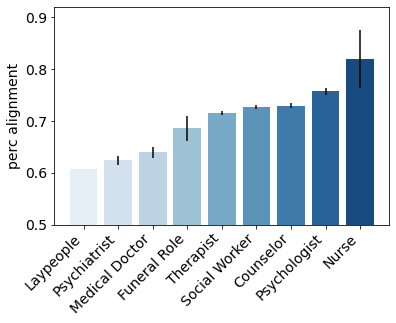

In [217]:
ax=sns.barplot(x='title', y='mean', data=grouped_highest_profession_normal_df, palette="Blues")
plt.errorbar(x=grouped_highest_profession_normal_df['title'], y=grouped_highest_profession_normal_df['mean'], yerr=grouped_highest_profession_normal_df['sem'], fmt='none', ecolor='black')
plt.xlabel('', fontsize=1)
plt.ylabel('perc alignment', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5)
# plt.tight_layout()
ax.tick_params(labelsize=14)
plt.savefig('figures/training_program_highest_barplot.pdf', bbox_inches='tight')

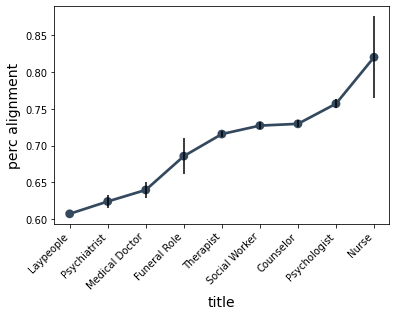

In [320]:
sns.pointplot(x='title', y='mean', data=grouped_highest_profession_normal_df, errorbar='sd', color='#34495E')
plt.errorbar(x=grouped_highest_profession_normal_df['title'], y=grouped_highest_profession_normal_df['mean'], yerr=grouped_highest_profession_normal_df['sem'], fmt='none', ecolor='black')
plt.xlabel('title', fontsize=14)
plt.ylabel('perc alignment', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig('figures/training_program_highest_pointplot.pdf')

### Training program with highest profession (same alignment)

In [288]:
### get all authors that have profession flairs
profession_authors = set()
for r in results:
    if r['observer_author_flair_text']:
        clean_flair = re.sub(' \[\d+\]', '', r['observer_author_flair_text'])
        r['observer_author_flair_text'] = clean_flair
        if clean_flair in profession_flairs:
            profession_authors.add(r['observer_author'])
print(len(profession_authors))

1135


In [289]:
# prepare data for training program
profs_training_program = []
for i in results:
    if i['observer_author'] in profession_authors:
        # search for title
        if i['observer_author_flair_text'] and i['observer_author_flair_text'] in profession_flairs:
            title = flair_mapping.loc[flair_mapping['Flair']==i['observer_author_flair_text'], 'title'].values[0]
        else: title = None
        profs_training_program.append({
            'title': title,
            'observer_author': i['observer_author'],
            'alignments': i['alignments'],
            'observer_created_utc': i['observer_created_utc'],
            'perc_alignment': i['perc_alignment'],
            'perc_same_alignment': i['perc_same_alignment']
        })
print(len(profs_training_program)) # 21747

21747


In [290]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(profs_training_program, indent=4))

In [ ]:
profs_training_program_df = pd.DataFrame(profs_training_program)
profs_training_program_df.head()

In [298]:
author_profs_training_program_df = profs_training_program_df.groupby("observer_author")
author_profs_training_program_df.size().mean()

19.16035242290749

In [299]:
def f(g):
    g = g.sort_values(by='observer_created_utc', ascending=False)
    titles = g.title.tolist()
    # 1. find the highest first
    # 2. search thw start of the highest flair, need to make sure that
    # all the flairs after this point is either highest_flair or None
    highest = None
    index = None
    for i, title in enumerate(titles):
        if title and title in profession_titles:
            if not highest: 
                highest = title
                index = i+1
            else:
                if title != highest: 
                    break
                else: 
                    index= i+1
    highest_convs = g[:index]
    highest_convs['title'] = highest_convs['title'].fillna(highest)
    return highest_convs
highest_profession_df = author_profs_training_program_df.apply(f)

In [300]:
highest_profession_df["observer_author"].value_counts().mean()

14.305726872246696

In [ ]:
highest_profession_normal_df = highest_profession_df.reset_index(drop=True)
highest_profession_normal_df

In [314]:
laypeopple_professional_same_alignment_df = pd.concat([highest_profession_normal_df, laypeople_data_df], ignore_index=True)

In [368]:
grouped_highest_profession_normal_df1 = laypeopple_professional_same_alignment_df.groupby('title')['perc_alignment'].agg(['mean', 'sem']).reset_index()
grouped_highest_profession_normal_df1['type']='any alignments'
grouped_highest_profession_normal_df1 = grouped_highest_profession_normal_df1.sort_values(by='mean')
grouped_highest_profession_normal_df1

,title,mean,sem,type
2,Laypeople,0.607104,0.000118,any alignments
5,Psychiatrist,0.623922,0.009041,any alignments
3,Medical Doctor,0.639613,0.010751,any alignments
1,Funeral Role,0.685684,0.024270,any alignments
8,Therapist,0.715724,0.004090,any alignments
7,Social Worker,0.727251,0.004503,any alignments
0,Counselor,0.729649,0.004731,any alignments
6,Psychologist,0.757053,0.006493,any alignments
4,Nurse,0.820370,0.055836,any alignments


In [370]:
grouped_highest_profession_normal_df2 = laypeopple_professional_same_alignment_df.groupby('title')['perc_same_alignment'].agg(['mean', 'sem']).reset_index()
grouped_highest_profession_normal_df2['type']='same alignments'
grouped_highest_profession_normal_df2

,title,mean,sem,type
0,Counselor,0.488872,0.005335,same alignments
1,Funeral Role,0.468162,0.025503,same alignments
2,Laypeople,0.373400,0.000115,same alignments
3,Medical Doctor,0.350712,0.010685,same alignments
4,Nurse,0.612858,0.053237,same alignments
5,Psychiatrist,0.344885,0.008709,same alignments
6,Psychologist,0.514450,0.007400,same alignments
7,Social Worker,0.490534,0.005012,same alignments
8,Therapist,0.467777,0.004455,same alignments


In [371]:
grouped_highest_profession_normal_df = pd.concat([grouped_highest_profession_normal_df1,grouped_highest_profession_normal_df2])
grouped_highest_profession_normal_df

,title,mean,sem,type
2,Laypeople,0.607104,0.000118,any alignments
5,Psychiatrist,0.623922,0.009041,any alignments
3,Medical Doctor,0.639613,0.010751,any alignments
1,Funeral Role,0.685684,0.024270,any alignments
8,Therapist,0.715724,0.004090,any alignments
7,Social Worker,0.727251,0.004503,any alignments
0,Counselor,0.729649,0.004731,any alignments
6,Psychologist,0.757053,0.006493,any alignments
4,Nurse,0.820370,0.055836,any alignments
0,Counselor,0.488872,0.005335,same alignments


In [398]:
sems = [0.000118,
        0.009041,
        0.010751,
        0.024270,
        0.004090,
        0.004503,
        0.004731,
        0.006493,
        0.055836,
        0.000115,
        0.008709,
        0.010685,
        0.025503,
        0.004455,
        0.005012,
        0.005335,
        0.007400,
        0.053237
       ]
# sems = [0,
#         0.05,
#         0.1,
#         0.15,
#         0.2,
#         0.25,
#         0.3,
#         0.025503,
#         0.004090,
#         0.004455,
#         0.004503,
#         0.005012,
#         0.004731,
#         0.005335,
#         0.006493,
#         0.007400,
#         0.055836,
#         0.053237
#        ]

In [399]:
# grouped_highest_profession_normal_df.to_csv("", index=False)

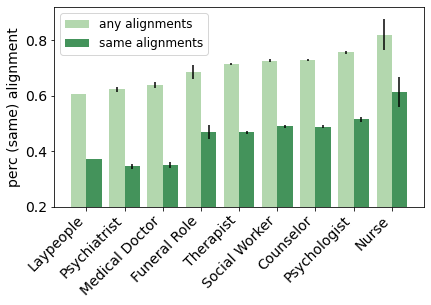

In [404]:
ax=sns.barplot(y='mean',x='title', hue='type', data=grouped_highest_profession_normal_df,errorbar="se",palette="Greens")
# plt.errorbar(x=grouped_highest_profession_normal_df['title'], y=grouped_highest_profession_normal_df['mean'], yerr=grouped_highest_profession_normal_df['sem'], fmt='none', ecolor='black')
ax.legend_.remove()
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=sems, fmt="none", c="k")

plt.xlabel('', fontsize=1)
plt.ylabel('perc (same) alignment', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.2)
plt.legend(fontsize=12)
plt.tight_layout()
ax.tick_params(labelsize=14)
plt.savefig('figures/training_program_same_alignment_highest_barplot.pdf', bbox_inches='tight')

### Licensed vs. Student (Full peirod considered)

In [59]:
### get all authors that either have student / licensed flairs
licensed_student_authors = set()
for r in results:
    if r['observer_author_flair_text']:
        clean_flair = re.sub(' \[\d+\]', '', r['observer_author_flair_text'])
        r['observer_author_flair_text'] = clean_flair
        if (clean_flair in student_flairs) or (clean_flair in licensed_flairs):
            licensed_student_authors.add(r['observer_author'])
print(len(licensed_student_authors))

1326


In [60]:
# prepare data for licensed vs student
license_student = []
for i in results:
    if i['observer_author'] in licensed_student_authors:
        # search for title
        if i['observer_author_flair_text'] and (i['observer_author_flair_text'] in student_flairs or i['observer_author_flair_text'] in licensed_flairs) :
            title = flair_mapping.loc[flair_mapping['Flair']==i['observer_author_flair_text'], 'title'].values[0]
            tl = flair_mapping.loc[flair_mapping['Flair']==i['observer_author_flair_text'], 'training_level'].values[0]
        else: 
            title = None
            tl = None
        license_student.append({
            'subreddit': i['subreddit'],
            'target_comment_id': i['target_comment_id'],
            'title': title,
            'observer_author': i['observer_author'],
            'alignments': i['alignments'],
            'observer_created_utc': i['observer_created_utc'],
            'perc_alignment': i['perc_alignment'],
            'training_level': tl
        })
print(len(license_student))

25992


In [61]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(license_student, indent=4))

In [117]:
with open("", 'r') as f:
    license_student = json.load(f)

In [ ]:
licensed_student_unfilled_df = pd.DataFrame(license_student)
licensed_student_unfilled_df['is_title_visible']=~licensed_student_unfilled_df['title'].isna()
licensed_student_unfilled_df.head(100)

In [63]:
licensed_student_unfilled_df['title'].value_counts()

title
Therapist          2790
Counselor          2403
Social Worker      2059
Psychologist       1452
Medical Doctor      557
Psychiatrist        533
Funeral Role        118
Psychotherapist      29
Nurse                23
Name: count, dtype: int64

In [64]:
author_licensed_student_df = licensed_student_unfilled_df.groupby("observer_author")
author_licensed_student_df.size().mean()

19.601809954751133

In [ ]:
for author, g in author_licensed_student_df:
    if author == 'AZgirl70':
        print(g[g['observer_created_utc']>=1598300592])

In [65]:
def f(g):
    g = g.sort_values(by='observer_created_utc', ascending=False)
    titles = g.title.tolist()
    training_level = g.training_level.tolist()
    
    for i, (title, tl) in enumerate(zip(titles, training_level)):
        # fill licensed and student
        # cutoff at the start of student
        if tl and (tl == 'Licensed' or tl == 'Student'):
            g[:i]['training_level'].fillna(tl, inplace=True)
                
        if title and (title in profession_titles or title == "Psychotherapist"):
            # update the dataframe
            g[:i]['title'].fillna(title, inplace=True)

    # drop rows with None
    g.dropna(subset=['training_level'], inplace=True)
    # drop Psychotherapist period
    g.drop(g[g['title'] == "Psychotherapist"].index, inplace=True)
    
    # check if there's any cross of licensed and student
    tl_list = g['training_level'].tolist()
    has_student = False
    for i in tl_list:
        if has_student and i == 'Licensed': assert("cross training level")
        if i == 'Student': has_student = True
    return g

licensed_student_df = author_licensed_student_df.apply(f)

In [ ]:
licensed_student_df

In [ ]:
licensed_student_normal_full_df = licensed_student_df.reset_index(drop=True)
licensed_student_normal_full_df[licensed_student_normal_full_df['observer_author']=='AZgirl70']

In [68]:
# licensed_student_normal_full_df.to_json("/shared/3/projects/empathy-alignment/working-dir/models/src/analysis_jy/data/licensed_student_normal_full_df.jsonl", orient='records')

In [286]:
# only include titles both in licensed and student
not_include = ['Psychiatrist', 'Medical Doctor', 'Funeral Role', 'Nurse']
licensed_student_normal_df = licensed_student_normal_full_df[~licensed_student_normal_full_df['title'].isin(not_include)]

In [290]:
licensed_student_normal_df['training_level'].value_counts()

training_level
Licensed    14648
Student      2978
Name: count, dtype: int64

In [ ]:
licensed_student_normal_df.head()

In [293]:
save_for_regression = licensed_student_normal_full_df[['title','is_title_visible','subreddit', 'perc_alignment']]
save_for_regression.head()

,title,is_title_visible,subreddit,perc_alignment
0,Psychologist,True,psychotherapy,1.000000
1,Psychologist,True,psychotherapy,0.833333
2,Psychologist,True,psychotherapy,0.714286
3,Psychologist,True,psychotherapy,1.000000
4,Psychologist,False,MomForAMinute,0.333333


In [145]:
# save_for_regression.to_csv("", index=False)

In [294]:
(licensed_student_normal_df[licensed_student_normal_df['training_level']=='Student'])['title'].value_counts()

title
Counselor        1434
Therapist        1105
Social Worker     318
Psychologist      121
Name: count, dtype: int64

In [295]:
(licensed_student_normal_df[licensed_student_normal_df['training_level']=='Licensed'])['title'].value_counts()

title
Therapist        4973
Social Worker    4106
Counselor        3780
Psychologist     1789
Name: count, dtype: int64

In [235]:
licensed_student_normal_df[["observer_author","training_level"]].drop_duplicates().groupby("training_level").size()

training_level
Licensed    1070
Student      205
dtype: int64

In [367]:
# licensed_student_normal_df.to_csv("", index=False)

In [264]:
licensed_student_normal_df=pd.read_csv("")

In [ ]:
licensed_student_normal_df

In [ ]:
licensed_student_normal_df.head()

In [268]:
ttest_ind(licensed_student_normal_df[licensed_student_normal_df['training_level']=='Licensed']['perc_alignment'],
                licensed_student_normal_df[licensed_student_normal_df['training_level']=='Student']['perc_alignment'])

Ttest_indResult(statistic=-0.5193271448055711, pvalue=0.6035391486330687)

In [277]:
ttest_ind(licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Licensed') & (licensed_student_normal_df['title']=='Counselor')]['perc_alignment'],
                licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Student') & (licensed_student_normal_df['title']=='Counselor')]['perc_alignment'])

Ttest_indResult(statistic=1.4505605404396593, pvalue=0.14696244632893476)

In [ ]:
licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Licensed') & (licensed_student_normal_df['title']=='Counselor')]

In [278]:
ttest_ind(licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Licensed') & (licensed_student_normal_df['title']=='Social Worker')]['perc_alignment'],
                licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Student') & (licensed_student_normal_df['title']=='Social Worker')]['perc_alignment'])

Ttest_indResult(statistic=-1.0325439508644494, pvalue=0.3018738365524781)

In [279]:
ttest_ind(licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Licensed') & (licensed_student_normal_df['title']=='Therapist')]['perc_alignment'],
                licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Student') & (licensed_student_normal_df['title']=='Therapist')]['perc_alignment'])

Ttest_indResult(statistic=-3.050263450294798, pvalue=0.0022962643903848712)

In [280]:
ttest_ind(licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Licensed') & (licensed_student_normal_df['title']=='Psychologist')]['perc_alignment'],
                licensed_student_normal_df[(licensed_student_normal_df['training_level']=='Student') & (licensed_student_normal_df['title']=='Psychologist')]['perc_alignment'])

Ttest_indResult(statistic=-0.8327668409270685, pvalue=0.4050804635510131)

In [119]:
grouped_licensed_student_df = licensed_student_normal_df.groupby(['training_level', 'title'])['perc_alignment'].agg(['mean', 'sem']).reset_index()
grouped_licensed_student_df = grouped_licensed_student_df.sort_values(by='mean')
print(grouped_licensed_student_df)

  training_level          title      mean       sem
4        Student      Counselor  0.709128  0.007398
3       Licensed      Therapist  0.716093  0.004071
0       Licensed      Counselor  0.721760  0.004570
2       Licensed  Social Worker  0.728972  0.004461
7        Student      Therapist  0.744741  0.007826
6        Student  Social Worker  0.746027  0.014336
1       Licensed   Psychologist  0.756973  0.006442
5        Student   Psychologist  0.778451  0.027627


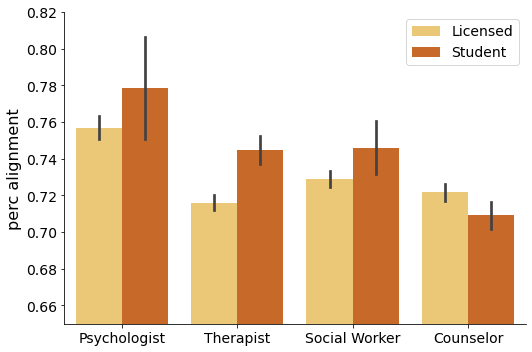

In [201]:
# sns.pointplot(y='mean', x='title', hue='training_level', data=grouped_licensed_student_df, palette="Paired", linestyle='')
ax=sns.catplot(y='perc_alignment', x='title', hue='training_level', data=licensed_student_normal_df, errorbar="se", kind='bar', palette='YlOrBr',aspect=1.5, legend=False)
plt.ylabel('perc alignment', fontsize=16)
plt.xlabel('', fontsize=1)
plt.xticks(rotation=90, ha='right')
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.85))
plt.ylim(0.65, 0.82)
plt.xticks(rotation=0, ha='center')
plt.legend(fontsize=14)
ax.tick_params(labelsize=14)
plt.tight_layout() 
plt.savefig('figures/license_student.pdf')

In [ ]:
licensed_df = licensed_student_normal_full_df[licensed_student_normal_full_df['training_level']=='Licensed']
licensed_df.head()

In [378]:
selected_licensed_df = licensed_df[['title', 'alignments']]
selected_laypeople_df = laypeople_data_df[['title', 'alignments']]
licensed_df = pd.concat([selected_licensed_df, selected_laypeople_df], ignore_index=True, sort=False)

In [379]:
grouped_licensed_df = licensed_df.groupby('title')

100%|██████████| 26585/26585 [00:00<00:00, 528870.98it/s]


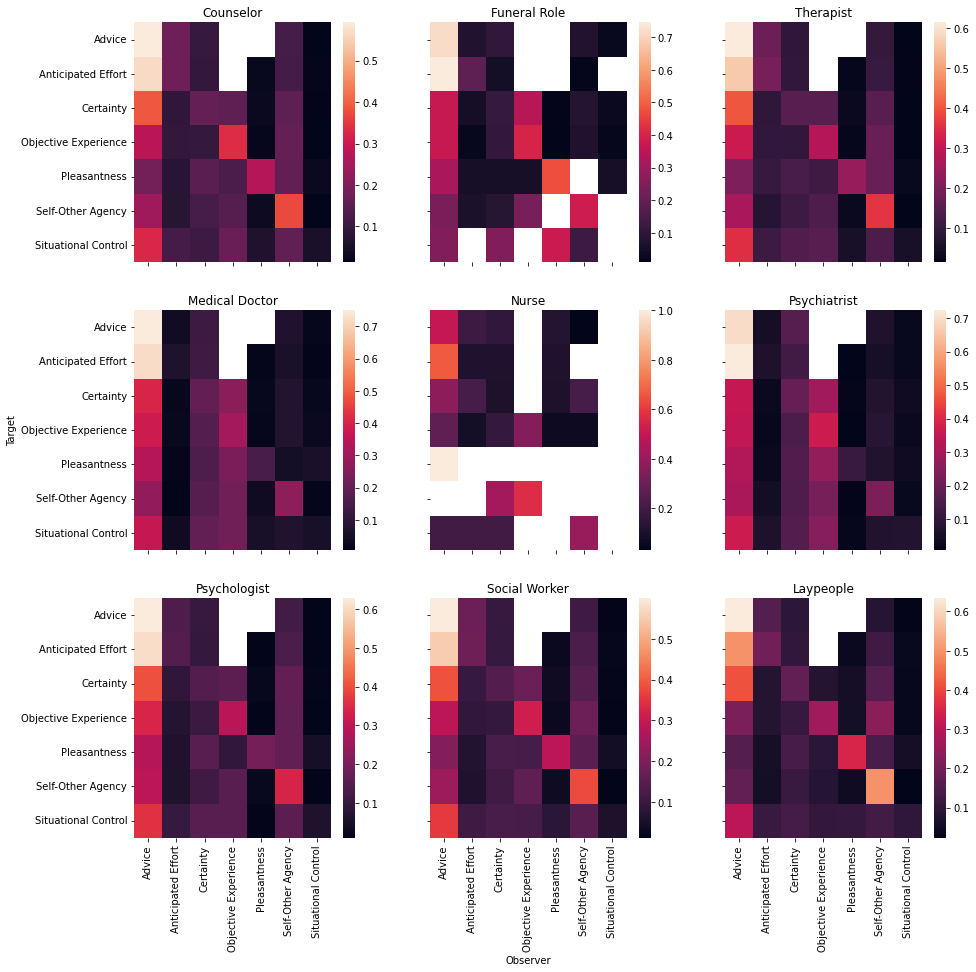

In [384]:
fig, axes = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(15, 15))
# sns.set(font_scale=1.5)
plt.xlabel('Aligned Observer Appraisal', fontsize = 15)
plt.ylabel('Target Appraisal', fontsize = 15) 

group_index = 0
laypeople_axes = None
for title, group in grouped_licensed_df:
    # make sure laypeople appear at (2,2)
    if group_index == 8 and title != "Laypeople":
        axes_x, axes_y = laypeople_axes    
    elif title != "Laypeople":
        axes_x = int(group_index/3)
        axes_y = group_index%3
    else:
        axes_x = 2
        axes_y = 2
        laypeople_axes = (int(group_index/3), group_index%3)
    
    alignments = group['alignments'].tolist()
    alignments = [item for sublist in alignments for item in sublist]
    align_counts = Counter()
    for alignment in tqdm(alignments):
        align_counts[(alignment[0][2],alignment[1][2])] += 1  

    align_merged_counts = Counter()
    for (first_element, _), count in align_counts.items():
        align_merged_counts[first_element] += count

    align_df = defaultdict(list)
    for index, (element, count) in enumerate(align_counts.items()):
        ta = element[0]
        oa = element[1]
        prob = count / align_merged_counts[ta]
        align_df['Target'].append(ta)
        align_df['Observer'].append(oa)
        align_df['Count'].append(count)
        align_df['Probability'].append(prob)  
    align_df = pd.DataFrame(align_df)
    if title=='Laypeople': 
        align_df.to_csv("/shared/3/projects/empathy-alignment/working-dir/models/src/analysis_jy/data/laypeople_align_df.csv", index=False)
    
    pdf = align_df.pivot(index='Target', columns='Observer', values='Probability')

    sns.heatmap(pdf, ax=axes[axes_x,axes_y])
    if group_index != 7: 
        axes[axes_x, axes_y].set_xlabel('')
    if group_index != 3: 
        axes[axes_x, axes_y].set_ylabel('')  
    axes[axes_x, axes_y].set_title(title)
    group_index += 1

plt.savefig('/shared/3/projects/empathy-alignment/working-dir/models/src/analysis_jy/figures/license_alignment_heatmap.pdf', bbox_inches = "tight")

#### Difference of appraisal in professionals and laypeople

In [97]:
licensed_student_normal_full_df=pd.read_json("")

In [ ]:
with open("", 'r') as f:
    laypeople_data = json.load(f)

In [29]:
laypeople_data_df = pd.DataFrame(laypeople_data)

In [45]:
print(len(licensed_student_normal_full_df))
print(set(licensed_student_normal_full_df.training_level.tolist()))
print(set(licensed_student_normal_full_df.title.tolist()))

20029
{'Licensed', 'Student'}
{'Therapist', 'Social Worker', 'Funeral Role', 'Medical Doctor', 'Psychiatrist', 'Nurse', 'Psychologist', 'Counselor'}


In [ ]:
laypeople_data_df.head()

In [47]:
# drop students and doctors/psychiatrist/funeral directors
compare_licensed_w_laypeople_df = licensed_student_normal_full_df[licensed_student_normal_full_df['training_level']!='Student']
compare_licensed_w_laypeople_df = compare_licensed_w_laypeople_df[compare_licensed_w_laypeople_df['title']!='Funeral Role']
compare_licensed_w_laypeople_df = compare_licensed_w_laypeople_df[compare_licensed_w_laypeople_df['title']!='Medical Doctor']
compare_licensed_w_laypeople_df = compare_licensed_w_laypeople_df[compare_licensed_w_laypeople_df['title']!='Psychiatrist']
len(compare_licensed_w_laypeople_df)

14671

In [ ]:
compare_licensed_w_laypeople_df.head()

In [49]:
print(set(compare_licensed_w_laypeople_df.training_level.tolist()))
print(set(compare_licensed_w_laypeople_df.title.tolist()))

{'Licensed'}
{'Therapist', 'Social Worker', 'Nurse', 'Psychologist', 'Counselor'}


In [52]:
def get_count_prob(all_alignments):
    align_counts = Counter()
    for alignments in tqdm(all_alignments):
        for alignment in alignments:
            align_counts[(alignment[0][2],alignment[1][2])] += 1  

    align_merged_counts = Counter()
    for (first_element, _), count in align_counts.items():
        align_merged_counts[first_element] += count

    align_df = defaultdict(list)
    for index, (element, count) in enumerate(align_counts.items()):
        ta = element[0]
        oa = element[1]
        prob = count / align_merged_counts[ta]
        align_df['Target'].append(ta)
        align_df['Observer'].append(oa)
        align_df['Count'].append(count)
        align_df['Probability'].append(prob)  
    
    return pd.DataFrame(align_df)

In [53]:
laypeople_align_df = get_count_prob(laypeople_data_df.alignments.tolist())

100%|██████████| 8864123/8864123 [00:51<00:00, 171738.02it/s]


In [54]:
professionals_align_df = get_count_prob(compare_licensed_w_laypeople_df.alignments.tolist())

100%|██████████| 14671/14671 [00:00<00:00, 73873.50it/s]


In [55]:
laypeople_align_df

,Target,Observer,Count,Probability
0,Advice,Self-Other Agency,403699,0.084260
1,Advice,Anticipated Effort,757683,0.158144
2,Certainty,Pleasantness,333110,0.057010
3,Pleasantness,Pleasantness,1207672,0.350886
4,Pleasantness,Anticipated Effort,209343,0.060824
5,Self-Other Agency,Pleasantness,323495,0.047082
6,Self-Other Agency,Situational Control,159293,0.023184
7,Certainty,Advice,2410044,0.412469
8,Objective Experience,Objective Experience,1330570,0.268126
9,Self-Other Agency,Advice,1219437,0.177478


In [79]:
# laypeople_align_df.to_csv('/shared/3/projects/empathy-alignment/working-dir/models/src/analysis_jy/data/laypeople_align_df.csv')

In [56]:
professionals_align_df

,Target,Observer,Count,Probability
0,Objective Experience,Advice,5577,0.300339
1,Anticipated Effort,Advice,5789,0.564836
2,Advice,Advice,10442,0.606036
3,Advice,Certainty,1650,0.095763
4,Objective Experience,Objective Experience,5667,0.305186
5,Objective Experience,Certainty,1772,0.095428
6,Self-Other Agency,Advice,3178,0.255898
7,Certainty,Self-Other Agency,1865,0.152320
8,Certainty,Advice,4839,0.395214
9,Certainty,Anticipated Effort,1109,0.090575


In [81]:
professionals_align_df.to_csv('/shared/3/projects/empathy-alignment/working-dir/models/src/analysis_jy/data/professionals_align_df.csv')

In [58]:
same_alignment_laypeople_df = laypeople_align_df[laypeople_align_df.Target==laypeople_align_df.Observer]
same_alignment_laypeople_df

,Target,Observer,Count,Probability
3,Pleasantness,Pleasantness,1207672,0.350886
8,Objective Experience,Objective Experience,1330570,0.268126
17,Self-Other Agency,Self-Other Agency,3413186,0.496758
20,Certainty,Certainty,1030737,0.176406
23,Anticipated Effort,Anticipated Effort,867461,0.197508
36,Situational Control,Situational Control,226978,0.098901
38,Advice,Advice,3039725,0.634454


In [59]:
same_alignment_professionals_df = professionals_align_df[professionals_align_df.Target==professionals_align_df.Observer]
same_alignment_professionals_df

,Target,Observer,Count,Probability
2,Advice,Advice,10442,0.606036
4,Objective Experience,Objective Experience,5667,0.305186
12,Self-Other Agency,Self-Other Agency,4548,0.366213
14,Anticipated Effort,Anticipated Effort,1843,0.179822
16,Certainty,Certainty,1872,0.152891
18,Pleasantness,Pleasantness,1031,0.257879
45,Situational Control,Situational Control,147,0.055682


In [61]:
same_alignment_df = pd.merge(same_alignment_laypeople_df, same_alignment_professionals_df, on='Target', how='left')
same_alignment_df

,Target,Observer_x,Count_x,Probability_x,Observer_y,Count_y,Probability_y
0,Pleasantness,Pleasantness,1207672,0.350886,Pleasantness,1031,0.257879
1,Objective Experience,Objective Experience,1330570,0.268126,Objective Experience,5667,0.305186
2,Self-Other Agency,Self-Other Agency,3413186,0.496758,Self-Other Agency,4548,0.366213
3,Certainty,Certainty,1030737,0.176406,Certainty,1872,0.152891
4,Anticipated Effort,Anticipated Effort,867461,0.197508,Anticipated Effort,1843,0.179822
5,Situational Control,Situational Control,226978,0.098901,Situational Control,147,0.055682
6,Advice,Advice,3039725,0.634454,Advice,10442,0.606036


In [72]:
same_alignment_df['difference'] = same_alignment_df['Probability_y']-same_alignment_df['Probability_x']
same_alignment_df.sort_values(by='difference', inplace=True)

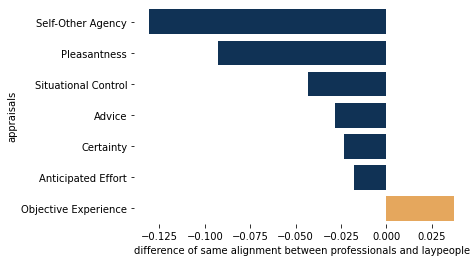

In [78]:
colors = ['#FCA946' if _y >=0 else '#053260' for _y in same_alignment_df['difference']]
ax = sns.barplot(same_alignment_df, y='Target',x='difference', orient='h', palette=colors)

plt.xlabel('difference of same alignment between professionals and laypeople')
plt.ylabel('appraisals')

sns.despine(ax=ax, bottom=True, left=True)
# plt.savefig('', bbox_inches = "tight")

In [94]:
laypeople_align_exclude_same_df = laypeople_align_df[laypeople_align_df.Target!=laypeople_align_df.Observer]
max_misalign_laypeople = laypeople_align_exclude_same_df.groupby('Target')['Probability'].idxmax()
max_misalign_laypeople_vals = laypeople_align_exclude_same_df.loc[max_misalign_laypeople]
max_misalign_laypeople_vals

,Target,Observer,Count,Probability
1,Advice,Anticipated Effort,757683,0.158144
13,Anticipated Effort,Advice,2185828,0.497680
7,Certainty,Advice,2410044,0.412469
26,Objective Experience,Self-Other Agency,1161445,0.234046
41,Pleasantness,Advice,546696,0.158841
9,Self-Other Agency,Advice,1219437,0.177478
37,Situational Control,Advice,705310,0.307324


In [95]:
professionals_align_exclude_same_df = professionals_align_df[professionals_align_df.Target!=professionals_align_df.Observer]
max_misalign_professionals = professionals_align_exclude_same_df.groupby('Target')['Probability'].idxmax()
max_misalign_professionals_vals = professionals_align_exclude_same_df.loc[max_misalign_professionals]
max_misalign_professionals_vals

,Target,Observer,Count,Probability
15,Advice,Anticipated Effort,2970,0.172374
1,Anticipated Effort,Advice,5789,0.564836
8,Certainty,Advice,4839,0.395214
0,Objective Experience,Advice,5577,0.300339
40,Pleasantness,Advice,834,0.208604
6,Self-Other Agency,Advice,3178,0.255898
30,Situational Control,Advice,914,0.346212


In [83]:
diff_alignment_df = pd.merge(laypeople_align_df, professionals_align_df, on=['Target','Observer'], how='left')
diff_alignment_df

,Target,Observer,Count_x,Probability_x,Count_y,Probability_y
0,Advice,Self-Other Agency,403699,0.084260,1909,0.110795
1,Advice,Anticipated Effort,757683,0.158144,2970,0.172374
2,Certainty,Pleasantness,333110,0.057010,378,0.030872
3,Pleasantness,Pleasantness,1207672,0.350886,1031,0.257879
4,Pleasantness,Anticipated Effort,209343,0.060824,323,0.080790
5,Self-Other Agency,Pleasantness,323495,0.047082,387,0.031162
6,Self-Other Agency,Situational Control,159293,0.023184,181,0.014574
7,Certainty,Advice,2410044,0.412469,4839,0.395214
8,Objective Experience,Objective Experience,1330570,0.268126,5667,0.305186
9,Self-Other Agency,Advice,1219437,0.177478,3178,0.255898


In [84]:
diff_alignment_df['difference'] = diff_alignment_df['Probability_y']-diff_alignment_df['Probability_x']
diff_alignment_df

,Target,Observer,Count_x,Probability_x,Count_y,Probability_y,difference
0,Advice,Self-Other Agency,403699,0.084260,1909,0.110795,0.026535
1,Advice,Anticipated Effort,757683,0.158144,2970,0.172374,0.014229
2,Certainty,Pleasantness,333110,0.057010,378,0.030872,-0.026138
3,Pleasantness,Pleasantness,1207672,0.350886,1031,0.257879,-0.093007
4,Pleasantness,Anticipated Effort,209343,0.060824,323,0.080790,0.019966
5,Self-Other Agency,Pleasantness,323495,0.047082,387,0.031162,-0.015920
6,Self-Other Agency,Situational Control,159293,0.023184,181,0.014574,-0.008609
7,Certainty,Advice,2410044,0.412469,4839,0.395214,-0.017255
8,Objective Experience,Objective Experience,1330570,0.268126,5667,0.305186,0.037060
9,Self-Other Agency,Advice,1219437,0.177478,3178,0.255898,0.078420


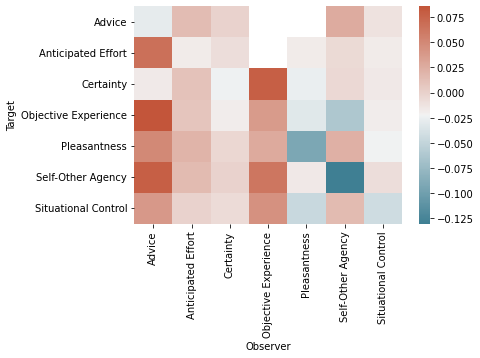

In [92]:
pdf = diff_alignment_df.pivot(index='Target', columns='Observer', values='difference')
sns.heatmap(pdf, cmap=sns.diverging_palette(220, 20, as_cmap=True))
# plt.savefig('', bbox_inches = "tight")

#### Difference of appraisal in professionals and laypeople (same conversation)

In [240]:
licensed_student_normal_full_df=pd.read_json("")

In [ ]:
for key, item in licensed_student_normal_full_df.groupby('observer_author'):
    if len(set(item['title'].tolist()))>1:
        print(item[['title','training_level']])

In [242]:
not_laypeople_authors = set(licensed_student_normal_full_df.observer_author.tolist())
len(not_laypeople_authors)

1321

In [243]:
# drop students and doctors/psychiatrist/funeral directors
compare_licensed_w_laypeople_df = licensed_student_normal_full_df[licensed_student_normal_full_df['training_level']!='Student']
compare_licensed_w_laypeople_df = compare_licensed_w_laypeople_df[compare_licensed_w_laypeople_df['title']!='Funeral Role']
compare_licensed_w_laypeople_df = compare_licensed_w_laypeople_df[compare_licensed_w_laypeople_df['title']!='Medical Doctor']
compare_licensed_w_laypeople_df = compare_licensed_w_laypeople_df[compare_licensed_w_laypeople_df['title']!='Psychiatrist']
len(compare_licensed_w_laypeople_df)

14671

In [244]:
concerned_prof_authors = set(compare_licensed_w_laypeople_df.observer_author.tolist())
len(concerned_prof_authors)

1073

In [ ]:
concerned_prof_authors

In [246]:
concerned_comment_ids = set(compare_licensed_w_laypeople_df.target_comment_id.tolist())
len(concerned_comment_ids)

8196

In [247]:
# find conversations that contain professionals
# split to laypeople and professionals
laypeople_same_conv = []
for post in tqdm(data):
    if post['id'] not in concerned_comment_ids: continue
    # calculate the perc of alignment
    target_num_spans = len(post['spans'])
    unique_alignments = set()
    same_unique_alignments = set()
    
    # collect laypeople
    # also ensure at least one laypeople
    has_laypeople = False
    for node in post['comments']:
        if node['author'] not in concerned_prof_authors:
            has_laypeople = True
    if not has_laypeople: continue
        
    for node in post['comments']:
        # exclude students and other profesisonals out of concern
        if node['author'] in concerned_prof_authors: continue
        for alignment in node['alignments']:
            # only add the start of the target span will be enough to identify it
            unique_alignments.add(alignment[0][0])
            if alignment[0][2] == alignment[1][2]:
                same_unique_alignments.add(alignment[0][0])
        perc_alignment = len(unique_alignments)/target_num_spans if target_num_spans > 0 else -1
        perc_same_alignment = len(same_unique_alignments)/target_num_spans if target_num_spans > 0 else -1
        laypeople_same_conv.append({
            'observer_author': node['author'],
            'observer_created_utc': node['created_utc'],
            'alignments': node['alignments'],
            'perc_alignment': perc_alignment
        }) 

100%|██████████| 2331142/2331142 [00:43<00:00, 54053.11it/s] 


In [248]:
print(len(laypeople_same_conv)) # 82904

82904


In [249]:
professionals_same_conv_df = compare_licensed_w_laypeople_df
laypeople_same_conv_df = pd.DataFrame(laypeople_same_conv)

In [250]:
def get_count_prob(all_alignments):
    align_counts = Counter()
    for alignments in tqdm(all_alignments):
        for alignment in alignments:
            align_counts[(alignment[0][2],alignment[1][2])] += 1  

    align_merged_counts = Counter()
    for (first_element, _), count in align_counts.items():
        align_merged_counts[first_element] += count

    align_df = defaultdict(list)
    for index, (element, count) in enumerate(align_counts.items()):
        ta = element[0]
        oa = element[1]
        prob = count / align_merged_counts[ta]
        align_df['Target'].append(ta)
        align_df['Observer'].append(oa)
        align_df['Count'].append(count)
        align_df['Probability'].append(prob)  
    
    return pd.DataFrame(align_df)

In [251]:
laypeople_align_same_conv_df = get_count_prob(laypeople_same_conv_df.alignments.tolist())
professionals_align_same_conv_df = get_count_prob(professionals_same_conv_df.alignments.tolist())

100%|██████████| 14671/14671 [00:00<00:00, 59619.25it/s]


In [254]:
laypeople_align_same_conv_df.to_csv('', index=False)
professionals_align_same_conv_df.to_csv('', index=False)

In [207]:
laypeople_align_same_conv_df = pd.read_csv('')
professionals_align_same_conv_df = pd.read_csv('')

In [255]:
same_alignment_professionals_same_conv_df = professionals_align_same_conv_df[professionals_align_same_conv_df.Target==professionals_align_same_conv_df.Observer]
same_alignment_professionals_same_conv_df

,Target,Observer,Count,Probability
2,Advice,Advice,10442,0.606036
4,Objective Experience,Objective Experience,5667,0.305186
12,Self-Other Agency,Self-Other Agency,4548,0.366213
14,Anticipated Effort,Anticipated Effort,1843,0.179822
16,Certainty,Certainty,1872,0.152891
18,Pleasantness,Pleasantness,1031,0.257879
45,Situational Control,Situational Control,147,0.055682


In [256]:
same_alignment_laypeople_same_conv_df = laypeople_align_same_conv_df[laypeople_align_same_conv_df.Target==laypeople_align_same_conv_df.Observer]
same_alignment_laypeople_same_conv_df

,Target,Observer,Count,Probability
1,Certainty,Certainty,9776,0.164466
2,Objective Experience,Objective Experience,21367,0.281872
4,Self-Other Agency,Self-Other Agency,36617,0.467614
6,Anticipated Effort,Anticipated Effort,9587,0.210866
12,Advice,Advice,31508,0.557772
35,Situational Control,Situational Control,1151,0.081992
44,Pleasantness,Pleasantness,8837,0.318519


In [257]:
same_alignment_same_conv_df = pd.merge(same_alignment_laypeople_same_conv_df, same_alignment_professionals_same_conv_df, on='Target', how='left')
same_alignment_same_conv_df

,Target,Observer_x,Count_x,Probability_x,Observer_y,Count_y,Probability_y
0,Certainty,Certainty,9776,0.164466,Certainty,1872,0.152891
1,Objective Experience,Objective Experience,21367,0.281872,Objective Experience,5667,0.305186
2,Self-Other Agency,Self-Other Agency,36617,0.467614,Self-Other Agency,4548,0.366213
3,Anticipated Effort,Anticipated Effort,9587,0.210866,Anticipated Effort,1843,0.179822
4,Advice,Advice,31508,0.557772,Advice,10442,0.606036
5,Situational Control,Situational Control,1151,0.081992,Situational Control,147,0.055682
6,Pleasantness,Pleasantness,8837,0.318519,Pleasantness,1031,0.257879


In [258]:
same_alignment_same_conv_df['difference'] = same_alignment_same_conv_df['Probability_y']-same_alignment_same_conv_df['Probability_x']
same_alignment_same_conv_df.sort_values(by='difference', inplace=True)

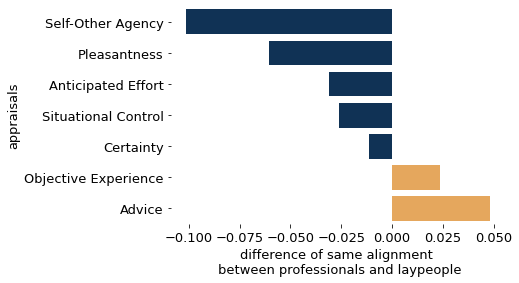

In [259]:
colors = ['#FCA946' if _y >=0 else '#053260' for _y in same_alignment_same_conv_df['difference']]
ax = sns.barplot(same_alignment_same_conv_df, y='Target',x='difference', orient='h', palette=colors)

plt.xlabel('difference of same alignment \n between professionals and laypeople', fontsize=13)
plt.ylabel('appraisals', fontsize=13)
ax.tick_params(labelsize=13)
sns.despine(ax=ax, bottom=True, left=True)
plt.savefig('', bbox_inches = "tight")

In [260]:
laypeople_align_exclude_same_df = laypeople_align_same_conv_df[laypeople_align_same_conv_df.Target!=laypeople_align_same_conv_df.Observer]
max_misalign_laypeople = laypeople_align_exclude_same_df.groupby('Target')['Probability'].idxmax()
max_misalign_laypeople_vals = laypeople_align_exclude_same_df.loc[max_misalign_laypeople]
max_misalign_laypeople_vals

,Target,Observer,Count,Probability
17,Advice,Anticipated Effort,10163,0.179911
11,Anticipated Effort,Advice,21671,0.476652
26,Certainty,Advice,20640,0.347235
3,Objective Experience,Self-Other Agency,18821,0.248285
10,Pleasantness,Self-Other Agency,5215,0.187969
18,Self-Other Agency,Advice,13610,0.173805
24,Situational Control,Advice,3989,0.284157


In [261]:
professionals_align_exclude_same_df = professionals_align_same_conv_df[professionals_align_same_conv_df.Target!=professionals_align_same_conv_df.Observer]
max_misalign_professionals = professionals_align_exclude_same_df.groupby('Target')['Probability'].idxmax()
max_misalign_professionals_vals = professionals_align_exclude_same_df.loc[max_misalign_professionals]
max_misalign_professionals_vals

,Target,Observer,Count,Probability
15,Advice,Anticipated Effort,2970,0.172374
1,Anticipated Effort,Advice,5789,0.564836
8,Certainty,Advice,4839,0.395214
0,Objective Experience,Advice,5577,0.300339
40,Pleasantness,Advice,834,0.208604
6,Self-Other Agency,Advice,3178,0.255898
30,Situational Control,Advice,914,0.346212


In [262]:
diff_alignment_same_conv_df = pd.merge(laypeople_align_same_conv_df, professionals_align_same_conv_df, on=['Target','Observer'], how='left')
diff_alignment_same_conv_df['difference'] = diff_alignment_same_conv_df['Probability_y']-diff_alignment_same_conv_df['Probability_x']
diff_alignment_same_conv_df

,Target,Observer,Count_x,Probability_x,Count_y,Probability_y,difference
0,Objective Experience,Anticipated Effort,6640,0.087594,1663,0.089558,0.001964
1,Certainty,Certainty,9776,0.164466,1872,0.152891,-0.011574
2,Objective Experience,Objective Experience,21367,0.281872,5667,0.305186,0.023314
3,Objective Experience,Self-Other Agency,18821,0.248285,3189,0.171738,-0.076547
4,Self-Other Agency,Self-Other Agency,36617,0.467614,4548,0.366213,-0.101401
5,Anticipated Effort,Self-Other Agency,7075,0.155614,1213,0.118353,-0.037261
6,Anticipated Effort,Anticipated Effort,9587,0.210866,1843,0.179822,-0.031043
7,Objective Experience,Advice,16907,0.223036,5577,0.300339,0.077304
8,Self-Other Agency,Objective Experience,9873,0.126082,1824,0.146872,0.020789
9,Self-Other Agency,Anticipated Effort,4937,0.063048,867,0.069812,0.006765


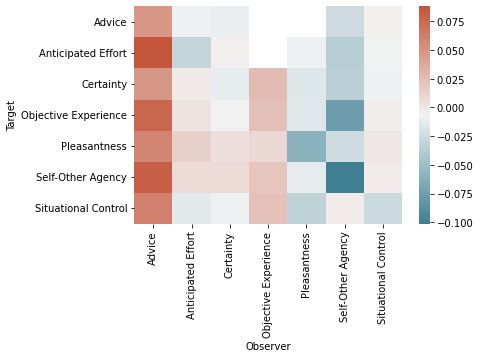

In [263]:
pdf = diff_alignment_same_conv_df.pivot(index='Target', columns='Observer', values='difference')
sns.heatmap(pdf, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.savefig('', bbox_inches = "tight")

### r/Advice

In [ ]:
advice_flairs = flair_mapping[(flair_mapping.training_level!="Licensed") & (flair_mapping.training_level!="Student") & (flair_mapping.training_level!="Unknown")]

In [ ]:
advice_flairs.head()

In [ ]:
len(advice_flairs)

In [154]:
advice_level = []
for i in profs_in_flairs:
    if i['observer_author_flair_text'] in advice_flairs.Flair.tolist():
        tl = advice_flairs.loc[advice_flairs['Flair']==i['observer_author_flair_text'], 'training_level'].values[0]
        advice_level.append({
            'flair': i['observer_author_flair_text'],
            'training_level': tl,
            'perc_alignment': i['perc_alignment']
        })
advice_level[:5]

[{'flair': 'Expert Advice Giver',
  'training_level': '2',
  'perc_alignment': 0.8},
 {'flair': 'Super Helper', 'training_level': '1', 'perc_alignment': 0.8},
 {'flair': 'Assistant Elder Sage',
  'training_level': '8',
  'perc_alignment': 0.8},
 {'flair': 'Helper', 'training_level': '0', 'perc_alignment': 0.8},
 {'flair': 'Helper', 'training_level': '0', 'perc_alignment': 0.8}]

In [140]:
# with open("", 'w') as outfile:
#     outfile.write(json.dumps(advice_level, indent=4))

In [193]:
with open("", 'r') as f:
    advice_level=json.load(f)

In [194]:
len(advice_level)

908670

In [195]:
advice_level_df = pd.DataFrame(advice_level)
advice_level_df.head()

,flair,training_level,perc_alignment
0,Expert Advice Giver,2,0.8
1,Super Helper,1,0.8
2,Assistant Elder Sage,8,0.8
3,Helper,0,0.8
4,Helper,0,0.8


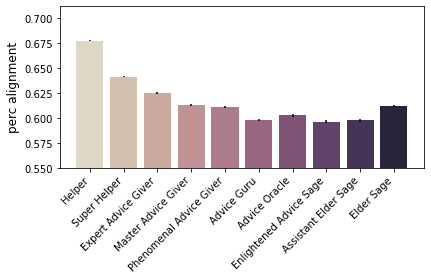

In [200]:
advice_level_df = advice_level_df.sort_values(by='training_level')
grouped_advice_level_df = advice_level_df.groupby(['training_level','flair'])['perc_alignment'].agg(['mean', 'sem']).reset_index()
# grouped_advice_level_df = grouped_advice_level_df.sort_values(by='training_level')

# plt.figure(figsize=(10, 8))
# sns.pointplot(x='flair', y='mean', data=grouped_advice_level_df, palette="ch:s=-.2,r=.6")
sns.barplot(x='flair', y='mean', data=grouped_advice_level_df, errorbar=None, palette="ch:s=-.2,r=.6")
plt.errorbar(x=grouped_advice_level_df['flair'], y=grouped_advice_level_df['mean'], yerr=grouped_advice_level_df['sem'], fmt='none', ecolor='black')
plt.xlabel('', fontsize=1)
plt.ylabel('perc alignment', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(ymin=0.55)
plt.tight_layout()
plt.savefig('figures/advice_level.pdf')

### Track authors from student to profession

In [ ]:
track_license_student_df = license_student_df.groupby("observer_author")
track_license_student_df.head()

In [248]:
student_flairs = set(license_student_flairs[license_student_flairs.training_level=="Student"].Flair.tolist())
licensed_flairs = set(license_student_flairs[license_student_flairs.training_level=="Licensed"].Flair.tolist())

In [ ]:
student_stage = []
licensed_stage = []

for title, g in track_license_student_df:
    g = g.sort_values(by='observer_created_utc', ascending=False)
    flairs = g.title.tolist()
    
    has_profession = False
#     student_start = None
    student_end = None
    for i, flair in enumerate(flairs):
        if flair in licensed_flairs:
            has_profession = True
        if has_profession and flair in student_flairs:
            if not student_end:
                student_end = i
                break
#             else:
#                 student_start = i
#     if student_start and student_end:
    if student_end:
        student_stage.append(g[: (student_end+1)])
        licensed_stage.append(g[(student_end+1):])

print(len(student_stage))
student_stage = pd.concat(student_stage)
licensed_stage = pd.concat(licensed_stage)